# Proccessing Offshore Buoy Data and Wave Height Observations

## Station 51201 - Waimea Bay, HI (106)

This notebook processes standard meteorological data for Station 51201 offshore of Waimea Bay and observations of max daily waveheight of northshore Oahu. Most wave height data was actually sourced from this github repo as I could not find any observations past 2004 from the original source below.

- Offshore meterological data: https://www.ndbc.noaa.gov/station_page.php?station=51201

- Wave height original data: https://www.nodc.noaa.gov/archive/arc0012/0001754/1.1/data/1-data/

- Wave height sourced data: https://github.com/benfreeston/surfline_recruitment_project



# Importing and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

## Offshore Data
Loading data from 2010 to 2016.

In [2]:
buoy_data = []

col_widths = [5, 3, 3, 3, 3, 4, 4, 5, 6, 6, 6, 4, 7, 7, 5, 6, 5, 5]

for file in [f"buoy{year}.txt" for year in range(2010, 2017)]:
    df = pd.read_fwf(("data/" + file),
                     skiprows = 2,
                     colspecs = [(sum(col_widths[:i]), sum(col_widths[:i+1])) for i in range(len(col_widths))],
                     names = ['year', 'month', 'day', 'hour', 'minute', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE'],
                     na_values = ['999', '99.0', '99.00', '9999.0', '999.0'])
    buoy_data.append(df)

offshore_data = pd.concat(buoy_data, ignore_index=True)
offshore_data.head()

,year,month,day,hour,minute,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2010,1,1,0,21,NaN,NaN,NaN,2.44,13.33,9.40,331,NaN,NaN,24.7,NaN,NaN,NaN
1,2010,1,1,0,51,NaN,NaN,NaN,2.51,14.29,9.29,326,NaN,NaN,24.8,NaN,NaN,NaN
2,2010,1,1,1,21,NaN,NaN,NaN,2.30,14.29,8.81,317,NaN,NaN,24.7,NaN,NaN,NaN
3,2010,1,1,1,51,NaN,NaN,NaN,2.83,13.33,9.89,319,NaN,NaN,24.7,NaN,NaN,NaN
4,2010,1,1,2,21,NaN,NaN,NaN,2.49,13.33,9.44,324,NaN,NaN,24.7,NaN,NaN,NaN


We also convert the time to Hawaiian local time to be consistent with the wave height observations data.

In [3]:
# Making index a Datetime variable
offshore_data.index = pd.to_datetime(offshore_data[['year', 'month', 'day', 'hour', 'minute']]) + timedelta(hours=-10)
offshore_data.index.name = 'DateTime'

#Drop old columns
offshore_data = offshore_data.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1)

#Convert to numeric
offshore_data = offshore_data.apply(pd.to_numeric)

offshore_data.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
DateTime,,,,,,,,,,,,,
2009-12-31 14:21:00,NaN,NaN,NaN,2.44,13.33,9.40,331,NaN,NaN,24.7,NaN,NaN,NaN
2009-12-31 14:51:00,NaN,NaN,NaN,2.51,14.29,9.29,326,NaN,NaN,24.8,NaN,NaN,NaN
2009-12-31 15:21:00,NaN,NaN,NaN,2.30,14.29,8.81,317,NaN,NaN,24.7,NaN,NaN,NaN
2009-12-31 15:51:00,NaN,NaN,NaN,2.83,13.33,9.89,319,NaN,NaN,24.7,NaN,NaN,NaN
2009-12-31 16:21:00,NaN,NaN,NaN,2.49,13.33,9.44,324,NaN,NaN,24.7,NaN,NaN,NaN


There is lots of columns with missing data, the variables of interest for predictors are `MWD`, `WVHT` and `DPD`.

## Waveheight Data

In [4]:
oahu_data = []

col_widths = [5, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5]
for file in [f"oahu{year}.txt" for year in range(2010, 2017)]:
    df = pd.read_fwf(("data/" + file),
                     names = ['year', 'month', 'day', 'nshor', 'wshor', 'almo', 'dh',
                              'winw', 'wspd', 'wdir', 'nsd', 'ssd'],
                     colspecs = [(sum(col_widths[:i]), sum(col_widths[:i+1])) for i in range(len(col_widths))],
                     na_values = ['999'])
    oahu_data.append(df)

wvht_obs = pd.concat(oahu_data, ignore_index=True)
wvht_obs.head()


,year,month,day,nshor,wshor,almo,dh,winw,wspd,wdir,nsd,ssd
0,2010,1,1,6,4,2,3,4,3,2,16.0,13.0
1,2010,1,2,7,4,2,2,3,2,17,14.0,NaN
2,2010,1,3,6,4,2,2,2,4,11,15.0,NaN
3,2010,1,4,6,3,2,2,2,4,11,14.0,NaN
4,2010,1,5,18,6,2,2,2,4,11,14.0,NaN


In [5]:
# Update index with new date format
wvht_obs.index = pd.to_datetime(wvht_obs[['year', 'month', 'day']])
wvht_obs.index.name = 'Date'

wvht_obs.head()

,year,month,day,nshor,wshor,almo,dh,winw,wspd,wdir,nsd,ssd
Date,,,,,,,,,,,,
2010-01-01,2010,1,1,6,4,2,3,4,3,2,16.0,13.0
2010-01-02,2010,1,2,7,4,2,2,3,2,17,14.0,NaN
2010-01-03,2010,1,3,6,4,2,2,2,4,11,15.0,NaN
2010-01-04,2010,1,4,6,3,2,2,2,4,11,14.0,NaN
2010-01-05,2010,1,5,18,6,2,2,2,4,11,14.0,NaN


# Exploratory Plots
## Offshore Buoy Data

### `WVHT` - Significant Wave Height

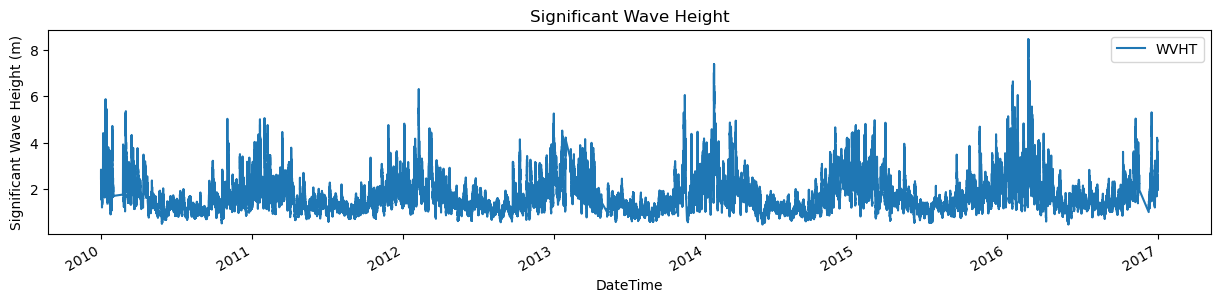

In [6]:
offshore_data.plot(y = 'WVHT',
                   figsize = (15, 3),
                   title = 'Significant Wave Height',
                   ylabel = 'Significant Wave Height (m)')
plt.show()

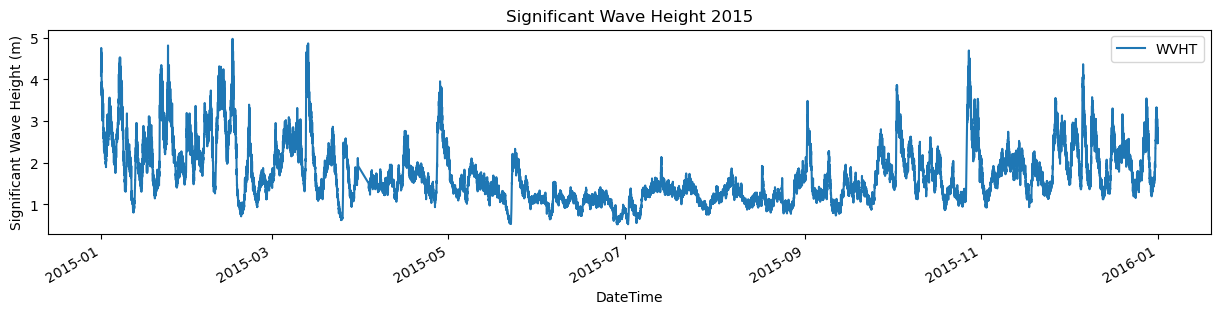

In [7]:
offshore_data.loc['2015-01-01':'2015-12-31'].plot(y = 'WVHT',
                                                  figsize = (15, 3),
                                                  title = 'Significant Wave Height 2015',
                                                  ylabel = 'Significant Wave Height (m)')
plt.show()

### `DPD` - Dominant Wave Period

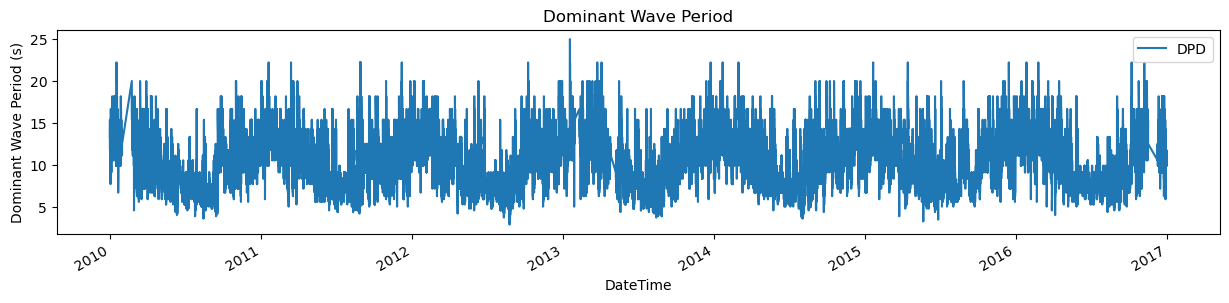

In [8]:
offshore_data.plot(y = 'DPD',
                   figsize = (15, 3),
                   title = 'Dominant Wave Period',
                   ylabel = 'Dominant Wave Period (s)')
plt.show()

### `MWD` - Mean Wave Direction
Plotted on polar axes.

In [9]:
df = offshore_data[['MWD','DPD']]
df = df[~df.isnull().any(axis=1)]

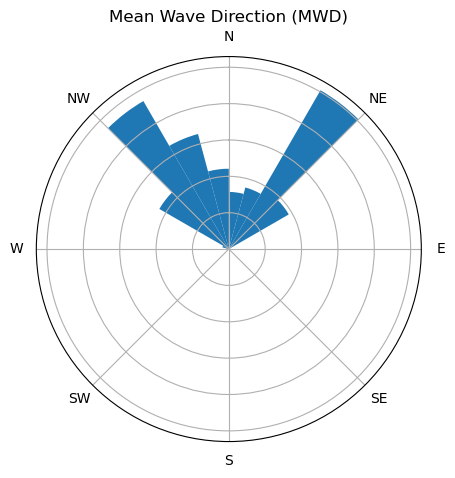

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},
                       figsize = (5, 5))
ax.hist(df['MWD'].values*np.pi/180, bins = np.linspace(0, 2*np.pi, 25)) #24 bins

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax.set_yticklabels([])
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
ax.set_title('Mean Wave Direction (MWD)')

plt.show()

## Observed Wave Heights Data
### North Shore Wave Height
Surf Heights given in Hawaii Scale Feet.

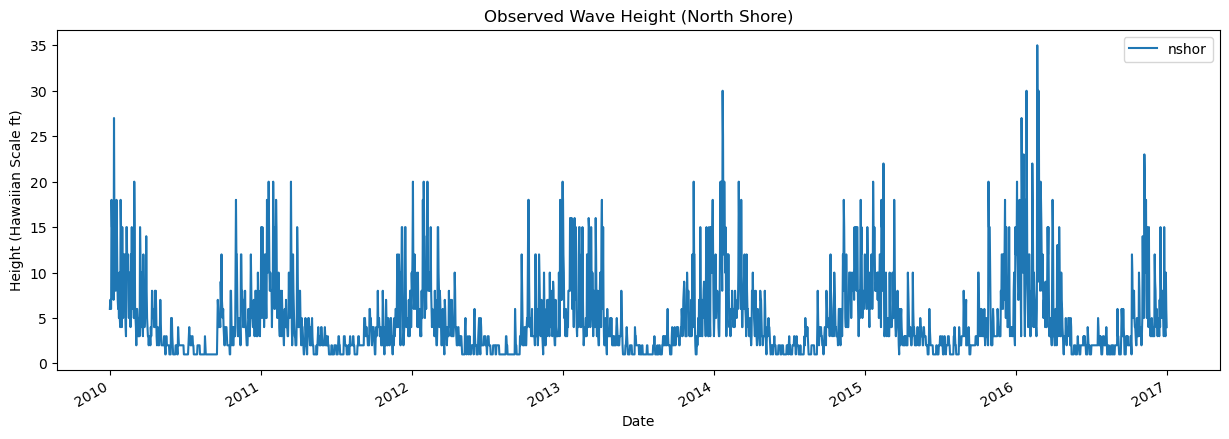

In [11]:
wvht_obs.plot(y = 'nshor',
                   figsize = (15, 5),
                   title = 'Observed Wave Height (North Shore)',
                   ylabel = 'Height (Hawaiian Scale ft)')
plt.show()

# Data Processing and Feature Engineering

We need to process the offshore buoy data by:

- Filtering out data before and after sunset in `offshore_data`.
- Filter rows to give only one observation per day, with maximum daily `WVHT`, mean daily `WVHT` and `WVHT` variance as the new features.
- Merge `offshore_data` and `wvht_obs` into one dataframe called `data` indexed by date.

In [12]:
df = offshore_data

#Select only values observed between 07:00 and 19:00
df = df[((df.index.hour >= 7) & (df.index.hour <= 19))]

#Calculate the mean and variance of WVHT on each date
wvht_mean = df.groupby(df.index.date)['WVHT'].mean().to_frame(name = 'WVHT_Mean').rename_axis('Date')
wvht_var = df.groupby(df.index.date)['WVHT'].var().to_frame(name = 'WVHT_Var').rename_axis('Date')

#Select the values for DPD and MWD that were recorded at the max WVHT.
idx = df.groupby(df.index.date)['WVHT'].idxmax()
df_max = df.loc[idx, ['WVHT', 'DPD', 'MWD']]

#merge with wvht_mean and wvht_variance on 'Date'
df_max['Date'] = df_max.index.date

df = pd.merge(df_max, wvht_mean, on='Date')
df = pd.merge(df, wvht_var, on='Date')

# Set the index to the original DateTime index of df_max
df = df.set_index(idx).drop(['Date'], axis = 1).rename_axis('DateTime')

df.head()

,WVHT,DPD,MWD,WVHT_Mean,WVHT_Var
DateTime,,,,,
2009-12-31 15:51:00,2.83,13.33,319,2.405833,0.030899
2010-01-01 08:51:00,2.28,11.11,332,1.967917,0.031417
2010-01-02 13:51:00,1.96,15.38,314,1.712308,0.019754
2010-01-03 08:51:00,1.84,14.29,319,1.518462,0.014574
2010-01-04 07:51:00,2.15,11.11,312,1.938889,0.021481


In [13]:
obs = wvht_obs['nshor'].to_frame(name='Obs')
df.index = df.index.date

# Merge the two data frames
data = pd.merge(df, obs, how = 'outer', left_index = True, right_index = True).rename_axis('Date')

data.head(10)

,WVHT,DPD,MWD,WVHT_Mean,WVHT_Var,Obs
Date,,,,,,
2009-12-31,2.83,13.33,319.0,2.405833,0.030899,NaN
2010-01-01,2.28,11.11,332.0,1.967917,0.031417,6.0
2010-01-02,1.96,15.38,314.0,1.712308,0.019754,7.0
2010-01-03,1.84,14.29,319.0,1.518462,0.014574,6.0
2010-01-04,2.15,11.11,312.0,1.938889,0.021481,6.0
2010-01-05,4.30,14.29,315.0,3.293077,0.328606,18.0
2010-01-06,3.47,16.67,308.0,3.026923,0.050318,15.0
2010-01-07,3.99,14.29,315.0,3.461923,0.056272,15.0
2010-01-08,3.51,14.29,312.0,2.998462,0.046214,15.0


Save this output as a csv file.

In [14]:
data.to_csv('processed_data.csv')

## Features Plotted

We also have an `MWD` feature which can't be plotted in the same format as it is an angle.

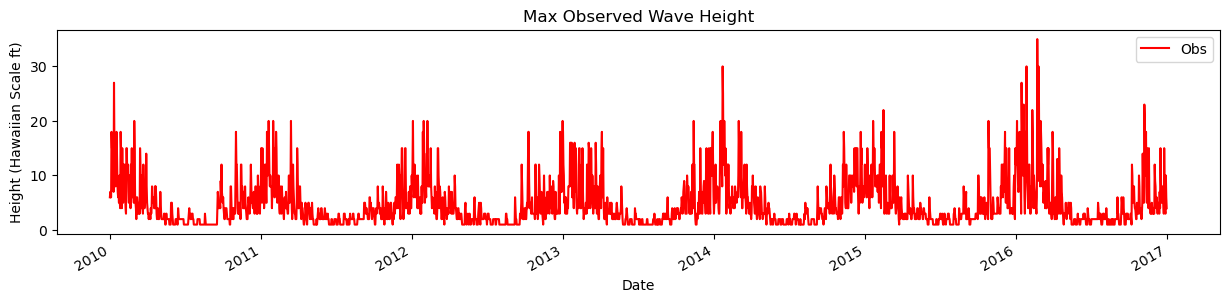

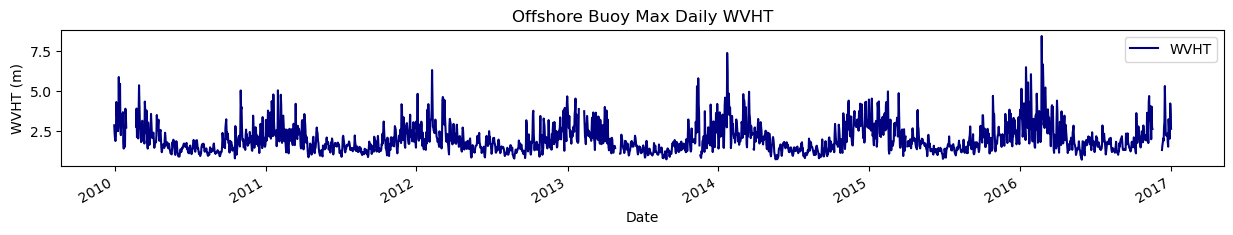

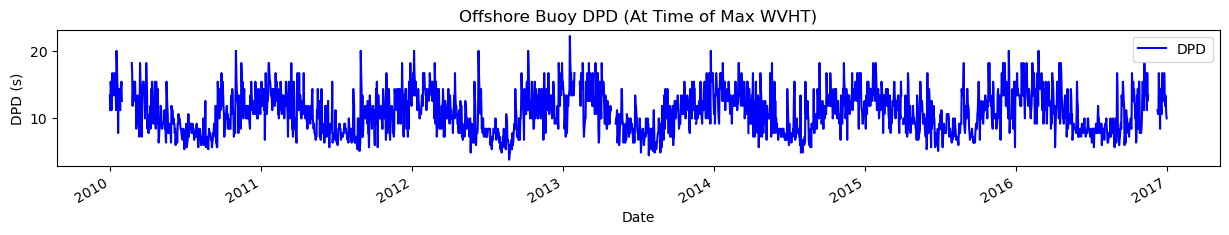

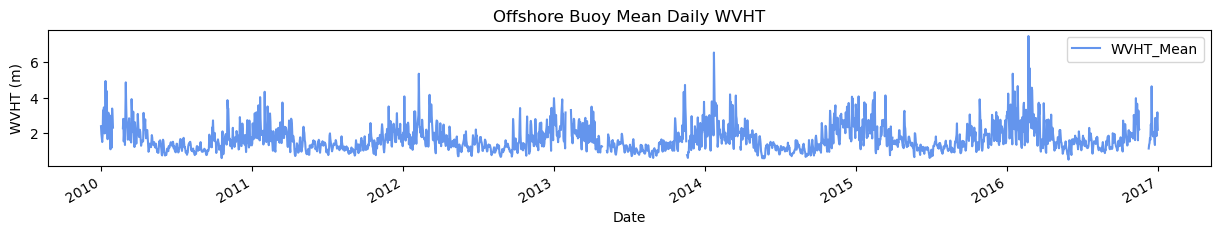

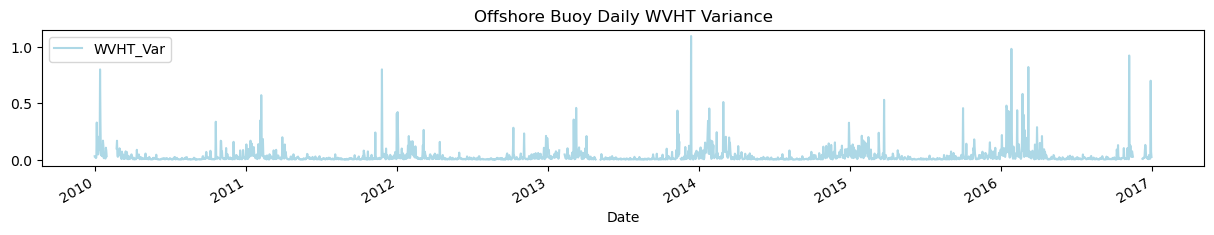

In [15]:
data.plot(y = 'Obs',
          figsize = (15, 3),
          color = 'red',
          title = 'Max Observed Wave Height',
          ylabel = 'Height (Hawaiian Scale ft)')
plt.show()

data.plot(y = 'WVHT',
          figsize = (15, 2),
          color = 'navy',
          title = 'Offshore Buoy Max Daily WVHT',
          ylabel = 'WVHT (m)')
plt.show()

data.plot(y = 'DPD',
          figsize = (15, 2),
          color = 'blue',
          title = 'Offshore Buoy DPD (At Time of Max WVHT)',
          ylabel = 'DPD (s)')
plt.show()

data.plot(y = 'WVHT_Mean',
          figsize = (15, 2),
          color = 'cornflowerblue',
          title = 'Offshore Buoy Mean Daily WVHT',
          ylabel = 'WVHT (m)')
plt.show()

data.plot(y = 'WVHT_Var',
          figsize = (15, 2),
          color = 'lightblue',
          title = 'Offshore Buoy Daily WVHT Variance')
plt.show()